In [16]:
pip install  pandas matplotlib numpy seaborn



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 621.2 kB/s eta 0:00:12
   ---- ----------------------------------- 0.8/7.8 MB 817.9 kB/s eta 0:00:09
   ----- ---------------------------------- 1.0/7.8 MB 1.0 MB/s eta 0:00:07
   ---------- ----------------------------- 2.1/7.8 MB 1.7 MB/s eta 0:00

In [10]:
import pandas as pd
def load_data():
    return pd.read_csv('../data/daily_activity.csv', index_col='Date', parse_dates=True)

In [17]:


df= load_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1316 entries, 2020-12-07 to 2024-08-21
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Move Minutes count            1117 non-null   float64
 1   Calories (kcal)               1316 non-null   float64
 2   Distance (m)                  1119 non-null   float64
 3   Heart Points                  1105 non-null   float64
 4   Heart Minutes                 1105 non-null   float64
 5   Low latitude (deg)            17 non-null     float64
 6   Low longitude (deg)           17 non-null     float64
 7   High latitude (deg)           17 non-null     float64
 8   High longitude (deg)          17 non-null     float64
 9   Average speed (m/s)           1119 non-null   float64
 10  Max speed (m/s)               1119 non-null   float64
 11  Min speed (m/s)               1119 non-null   float64
 12  Step count                    1119 non-null 

In [30]:
df['Month Name'] = df.index.month_name()
df['Day Name'] = df.index.day_name()
df['Year'] = df.index.year

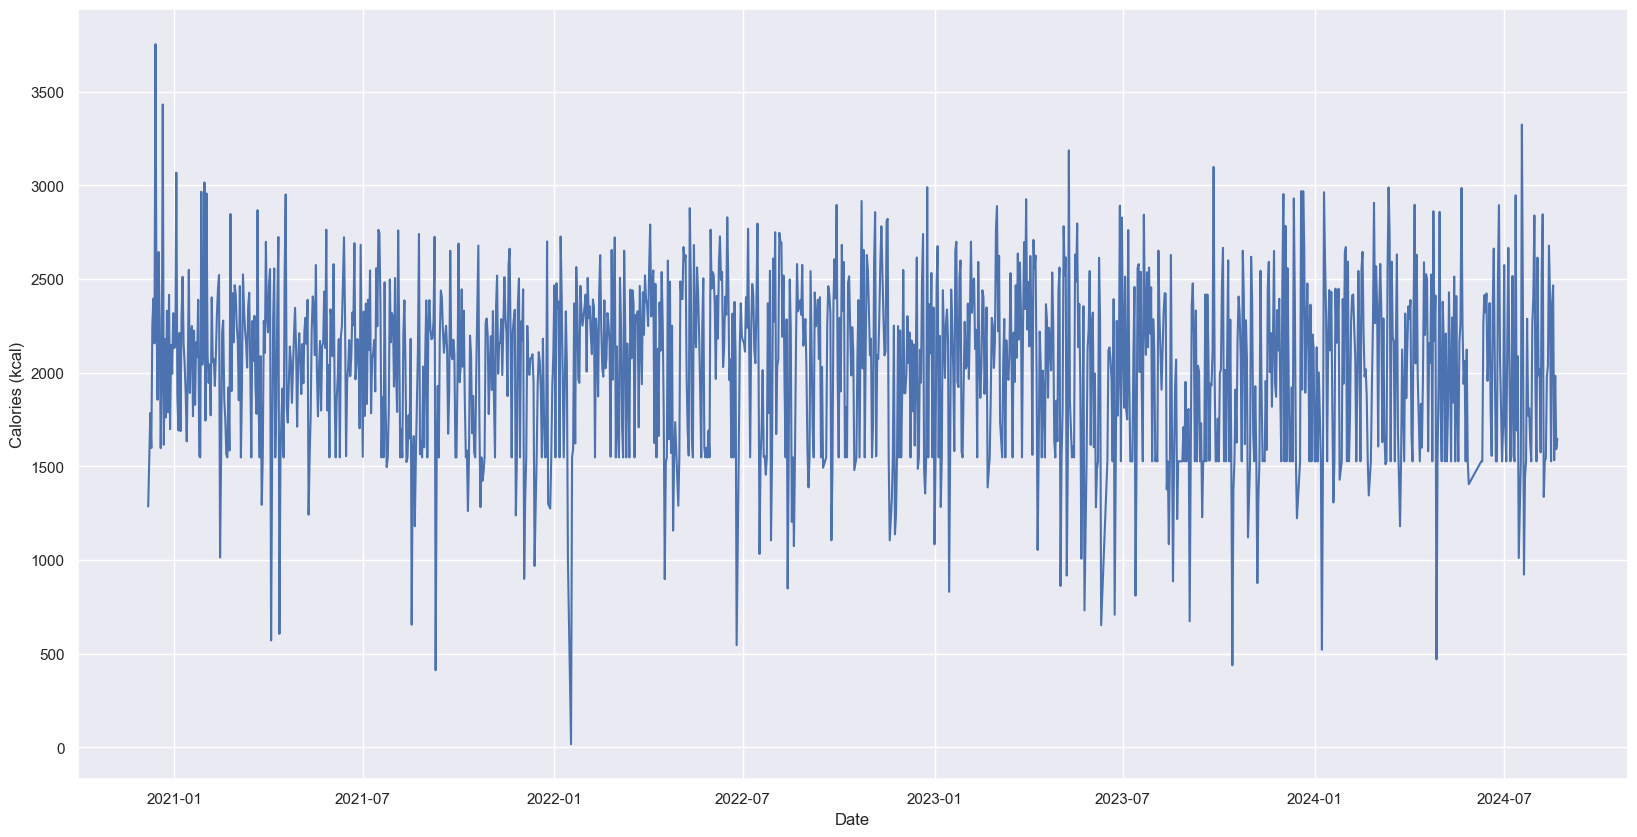

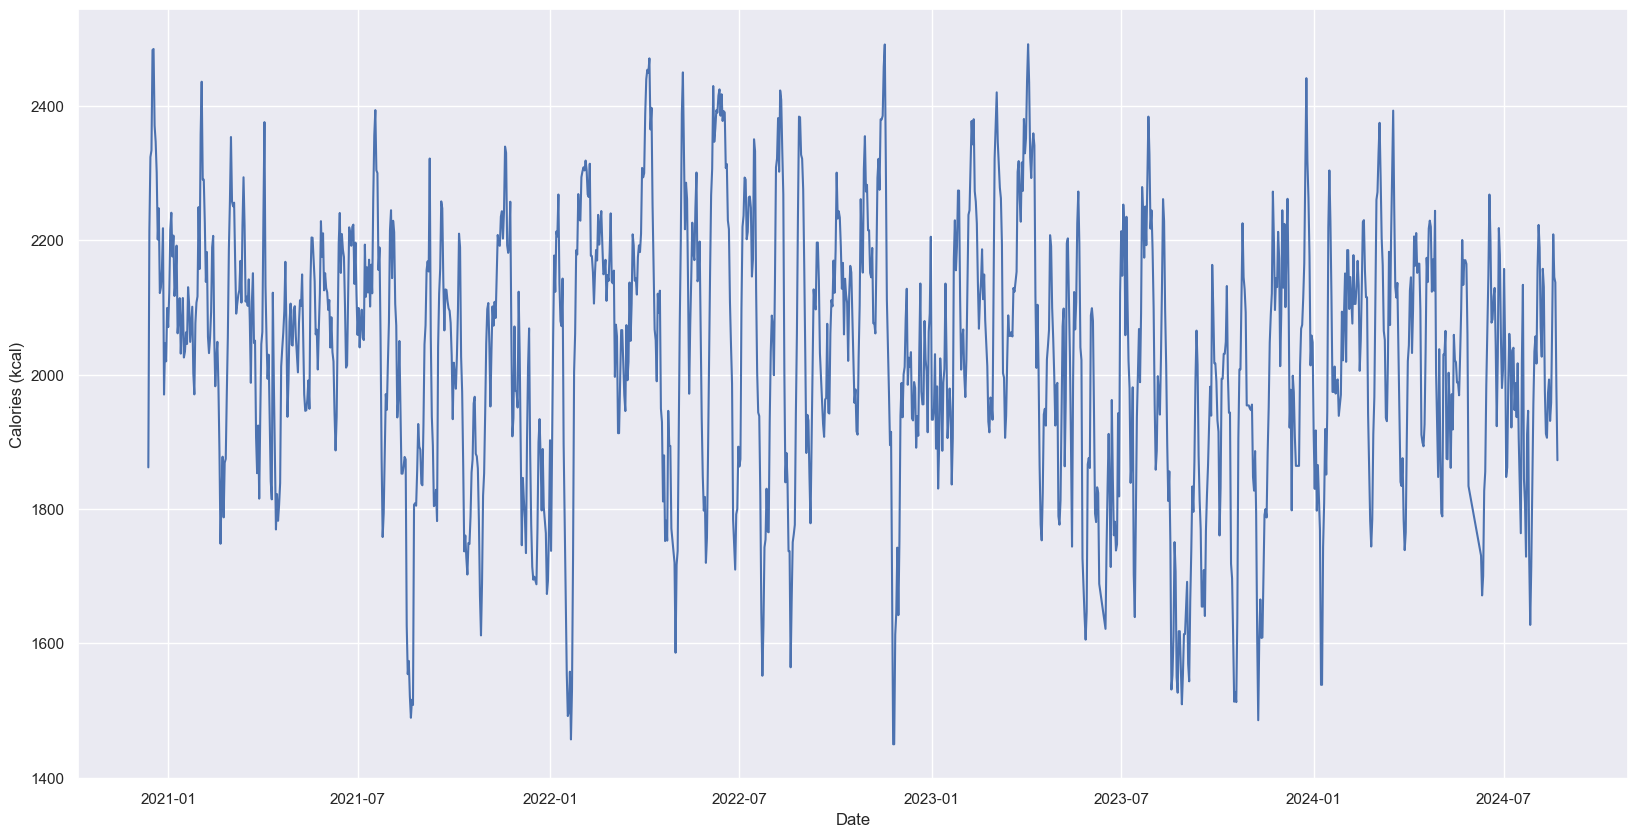

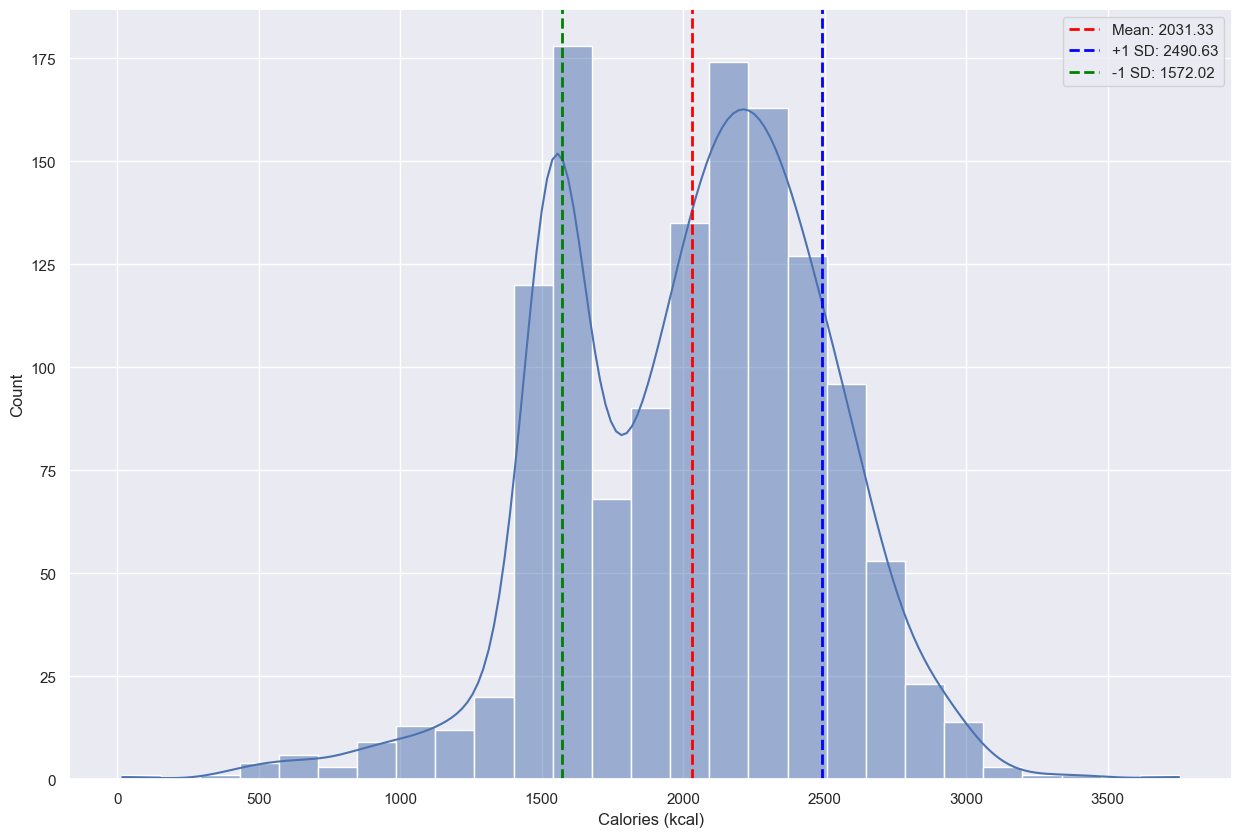

In [29]:
#create with seaboirn a plot of calories agains date
#make bigger the plot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x='Date', y='Calories (kcal)')

plt.show()

#create with seaboirn a plot of calories agains date
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x='Date', y=df['Calories (kcal)'].rolling(7).mean())

plt.show()

#histogram plot of calories with pdf and kde including the mean


plt.figure(figsize=(15,10))         
sns.set_theme(style="darkgrid")
sns.histplot(data=df, x='Calories (kcal)', kde=True)
mean_value = df['Calories (kcal)'].mean()
std_dev = df['Calories (kcal)'].std()
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(mean_value + std_dev, color='blue', linestyle='--', linewidth=2, label=f'+1 SD: {mean_value + std_dev:.2f}')
plt.axvline(mean_value - std_dev, color='green', linestyle='--', linewidth=2, label=f'-1 SD: {mean_value - std_dev:.2f}')

plt.legend()
plt.show()



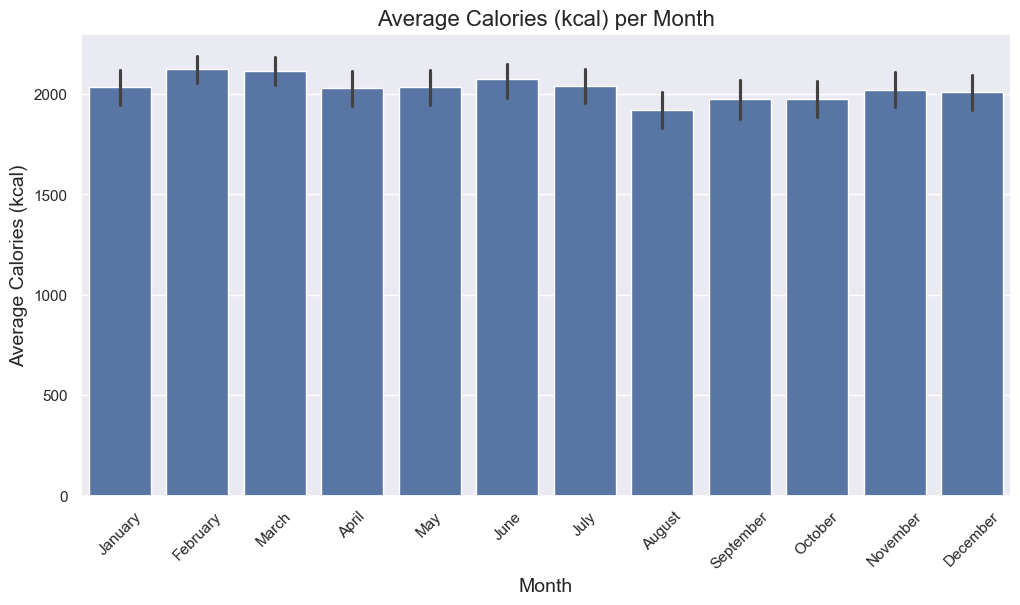

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Month Name' is in the DataFrame
df['Month Name'] = df.index.month_name()

ordered_months = ["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]
# Plot the bar diagram
plt.figure(figsize=(12, 6))
sns.barplot(x= df['Month Name'], y=df['Calories (kcal)'],  order=ordered_months) 

# Adding title and labels
plt.title('Average Calories (kcal) per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Calories (kcal)', fontsize=14)
plt.xticks(rotation=45)  # Rotate month names for better readability

# Display the plot
plt.show()


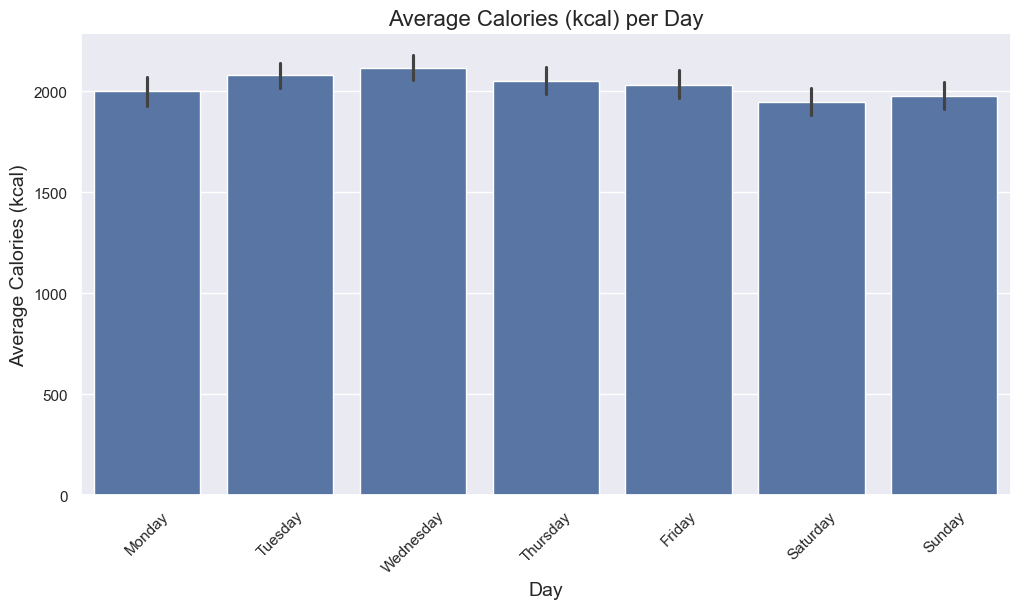

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Month Name' is in the DataFrame
df['Day Name'] = df.index.day_name()

# Sort the month names to appear in calendar order
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
                 

# Plot the bar diagram
plt.figure(figsize=(12, 6))
sns.barplot(x= df['Day Name'], y=df['Calories (kcal)'], order=ordered_days) 

# Adding title and labels
plt.title('Average Calories (kcal) per Day', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Average Calories (kcal)', fontsize=14)
plt.xticks(rotation=45)  # Rotate month names for better readability

# Display the plot
plt.show()


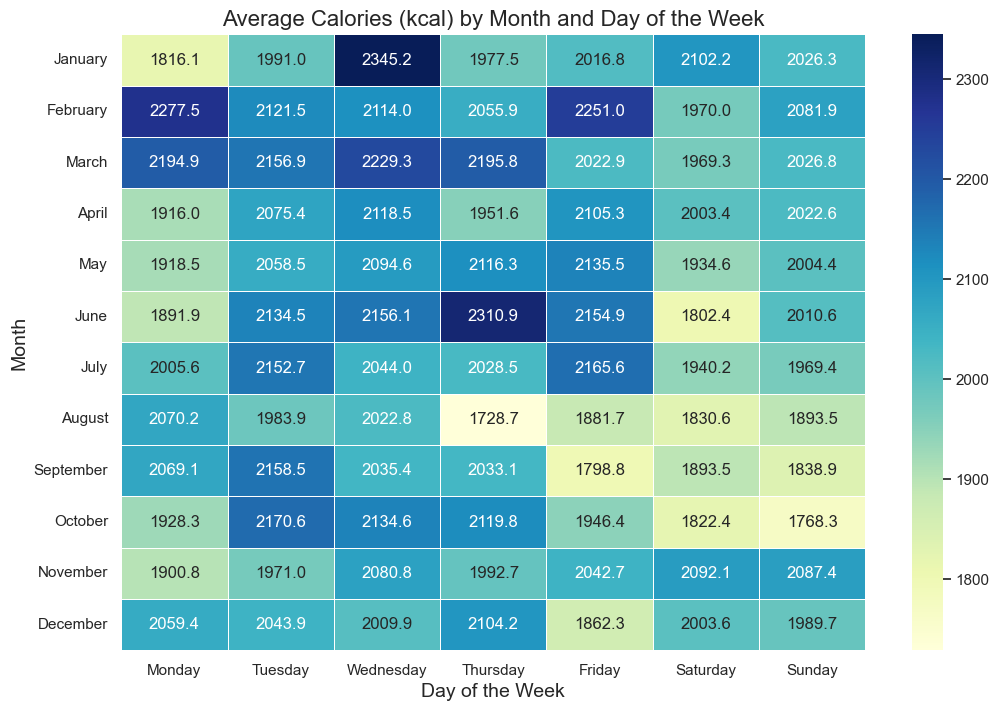

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'Month Name' and 'Day Name' are in the DataFrame
df['Month Name'] = df.index.month_name()
df['Day Name'] = df.index.day_name()

# Pivot the DataFrame to get the average calories by Month and Day
pivot_table = df.pivot_table(values='Calories (kcal)', index='Month Name', columns='Day Name', aggfunc='mean')

# Define the correct order for the months and days
ordered_months = ["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

pivot_table = pivot_table.reindex(index=ordered_months, columns=ordered_days)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)

# Adding title and labels
plt.title('Average Calories (kcal) by Month and Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Month', fontsize=14)

# Display the heatmap
plt.show()


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1316 entries, 2020-12-07 to 2024-08-21
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Move Minutes count            1117 non-null   float64
 1   Calories (kcal)               1316 non-null   float64
 2   Distance (m)                  1119 non-null   float64
 3   Heart Points                  1105 non-null   float64
 4   Heart Minutes                 1105 non-null   float64
 5   Low latitude (deg)            17 non-null     float64
 6   Low longitude (deg)           17 non-null     float64
 7   High latitude (deg)           17 non-null     float64
 8   High longitude (deg)          17 non-null     float64
 9   Average speed (m/s)           1119 non-null   float64
 10  Max speed (m/s)               1119 non-null   float64
 11  Min speed (m/s)               1119 non-null   float64
 12  Step count                    1119 non-null 

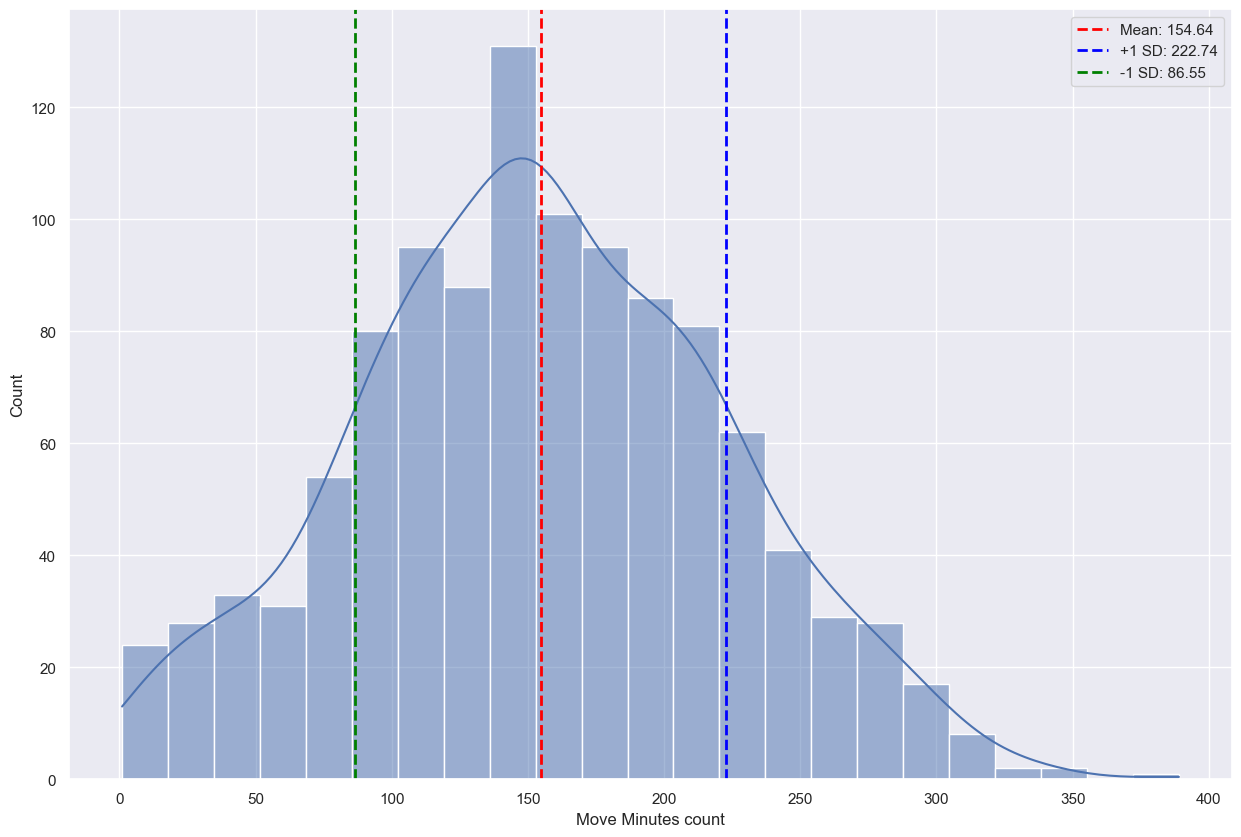

In [41]:
plt.figure(figsize=(15,10))         
sns.set_theme(style="darkgrid")
sns.histplot(data=df, x='Move Minutes count', kde=True)
mean_value = df['Move Minutes count'].mean()
std_dev = df['Move Minutes count'].std()
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(mean_value + std_dev, color='blue', linestyle='--', linewidth=2, label=f'+1 SD: {mean_value + std_dev:.2f}')
plt.axvline(mean_value - std_dev, color='green', linestyle='--', linewidth=2, label=f'-1 SD: {mean_value - std_dev:.2f}')

plt.legend()
plt.show()



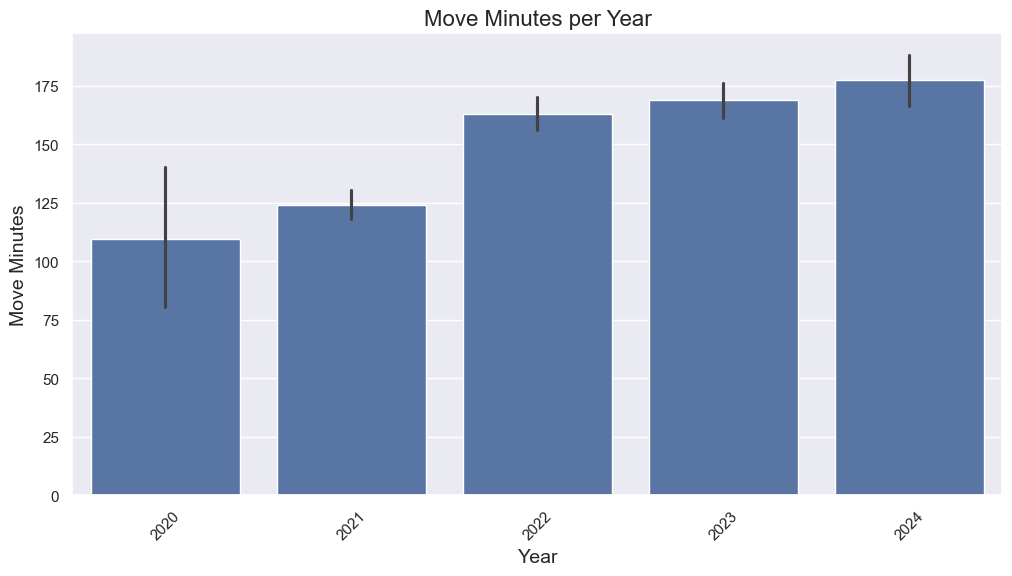

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Month Name' is in the DataFrame
df['Year'] = df.index.year


# Plot the bar diagram
plt.figure(figsize=(12, 6))
sns.barplot(x= df['Year'], y=df['Move Minutes count']) 

# Adding title and labels
plt.title('Move Minutes per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Move Minutes', fontsize=14)
plt.xticks(rotation=45)  # Rotate month names for better readability

# Display the plot
plt.show()


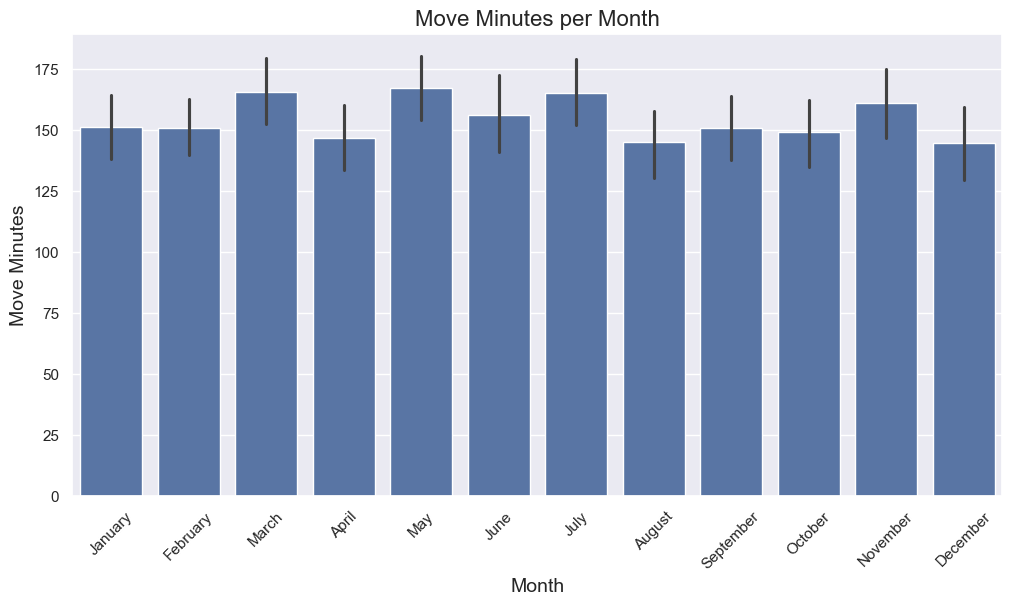

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Month Name' is in the DataFrame
df['Month Name'] = df.index.month_name()

ordered_months = ["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]
# Plot the bar diagram
plt.figure(figsize=(12, 6))
sns.barplot(x= df['Month Name'], y=df['Move Minutes count'],  order=ordered_months) 

# Adding title and labels
plt.title('Move Minutes per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Move Minutes', fontsize=14)
plt.xticks(rotation=45)  # Rotate month names for better readability

# Display the plot
plt.show()


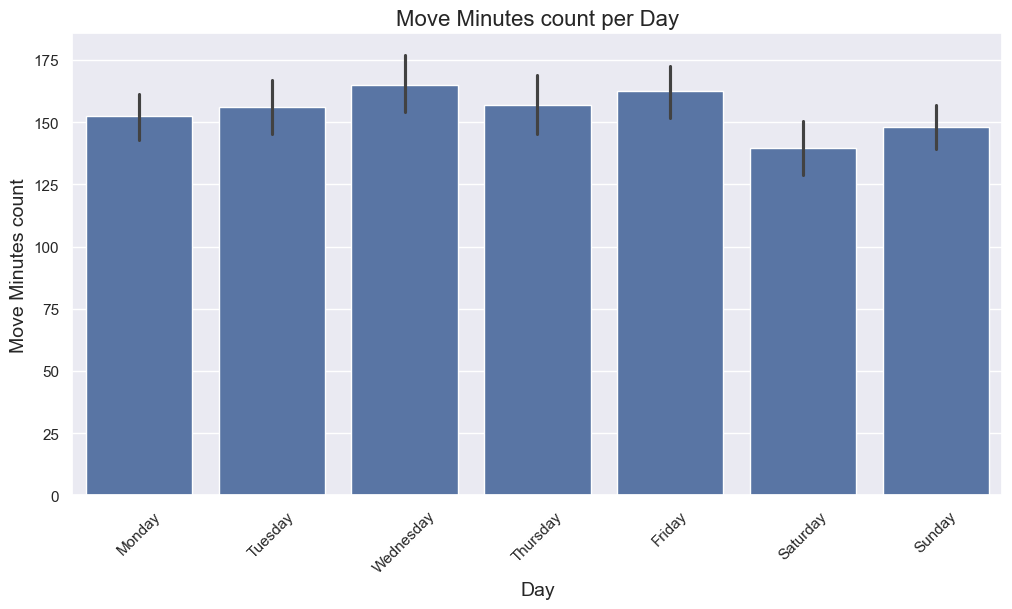

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Month Name' is in the DataFrame
df['Day Name'] = df.index.day_name()


# Sort the month names to appear in calendar order
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
                 

# Plot the bar diagram
plt.figure(figsize=(12, 6))
sns.barplot(x= df['Day Name'], y=df['Move Minutes count'], order=ordered_days) 

# Adding title and labels
plt.title('Move Minutes count per Day', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Move Minutes count', fontsize=14)
plt.xticks(rotation=45)  # Rotate month names for better readability

# Display the plot
plt.show()


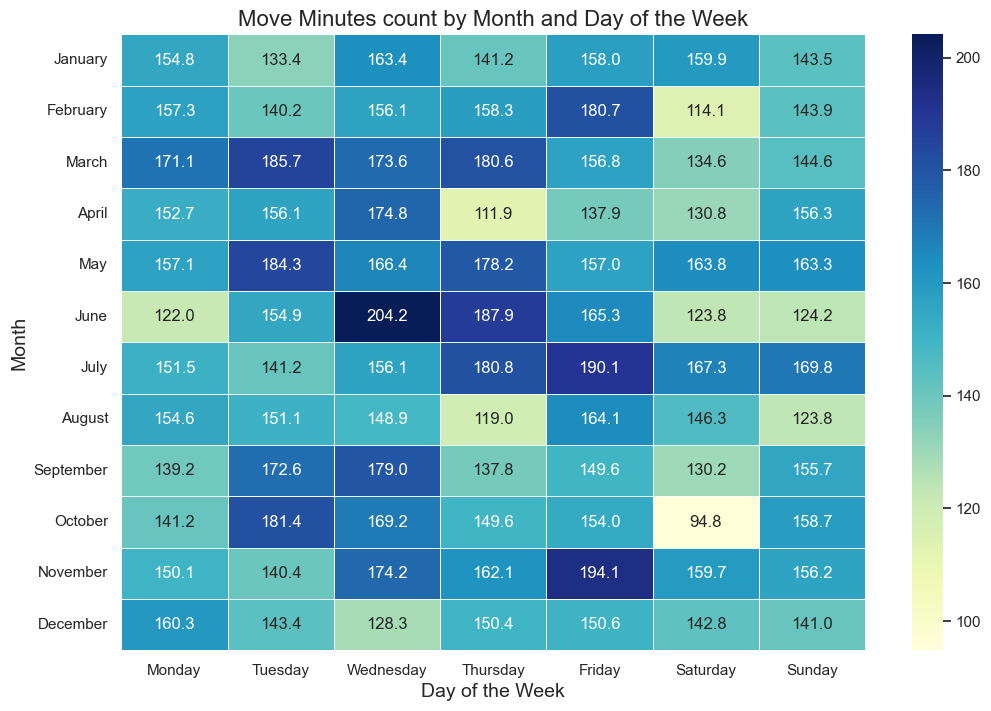

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'Month Name' and 'Day Name' are in the DataFrame
df['Month Name'] = df.index.month_name()
df['Day Name'] = df.index.day_name()

# Pivot the DataFrame to get the average calories by Month and Day
pivot_table = df.pivot_table(values='Move Minutes count', index='Month Name', columns='Day Name', aggfunc='mean')

# Define the correct order for the months and days
ordered_months = ["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

pivot_table = pivot_table.reindex(index=ordered_months, columns=ordered_days)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)

# Adding title and labels
plt.title('Move Minutes count by Month and Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Month', fontsize=14)

# Display the heatmap
plt.show()


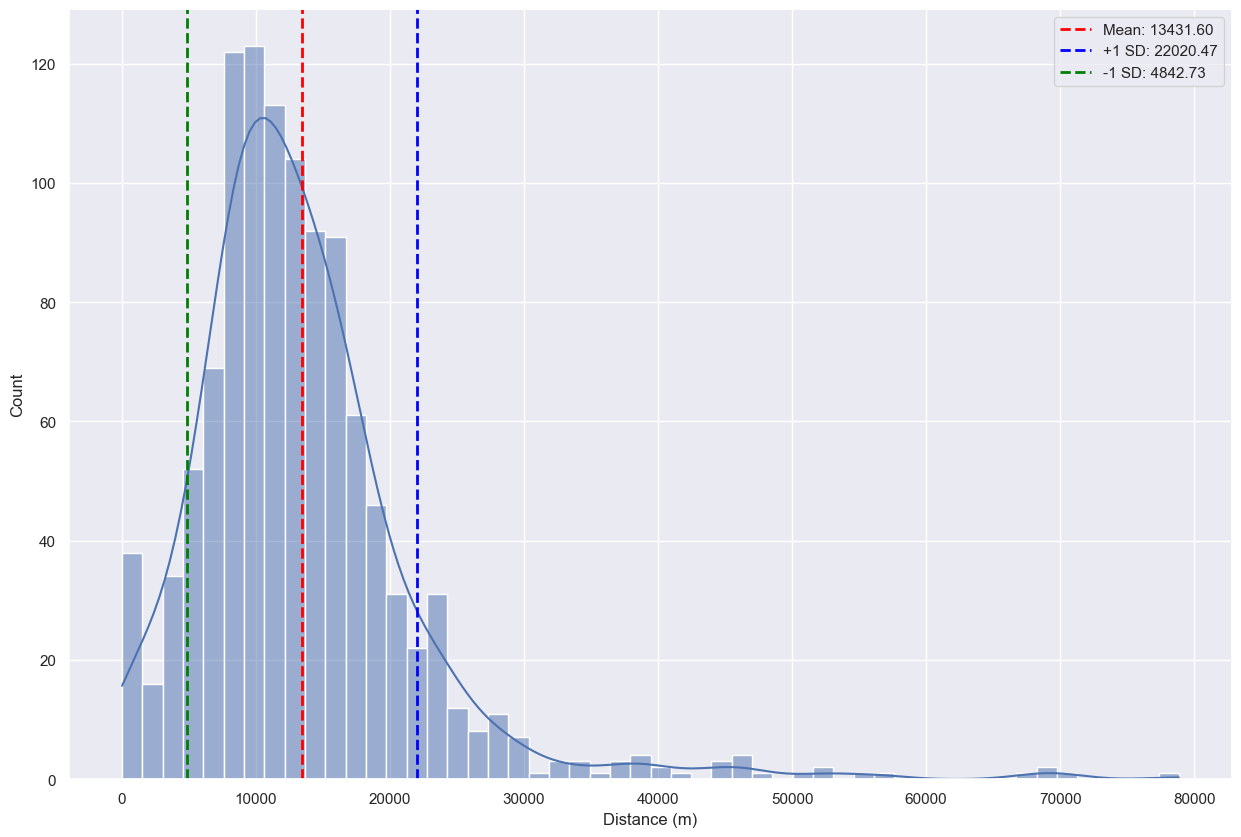

In [53]:
plt.figure(figsize=(15,10))         
sns.set_theme(style="darkgrid")
sns.histplot(data=df, x=df['Distance (m)'], kde=True)
mean_value = df['Distance (m)'].mean()
std_dev = df['Distance (m)'].std()
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(mean_value + std_dev, color='blue', linestyle='--', linewidth=2, label=f'+1 SD: {mean_value + std_dev:.2f}')
plt.axvline(mean_value - std_dev, color='green', linestyle='--', linewidth=2, label=f'-1 SD: {mean_value - std_dev:.2f}')

plt.legend()
plt.show()



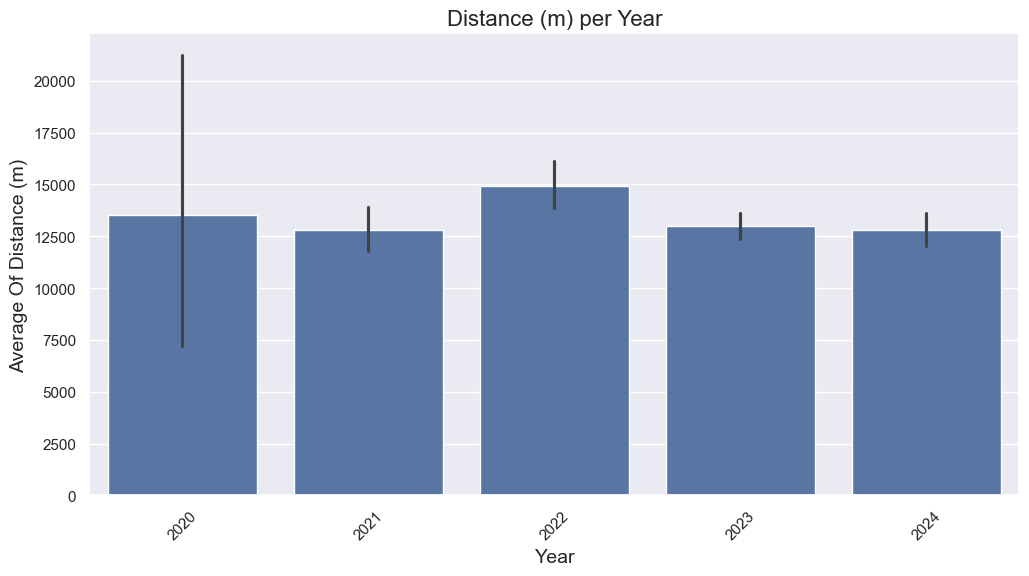

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Month Name' is in the DataFrame
df['Year'] = df.index.year


# Plot the bar diagram
plt.figure(figsize=(12, 6))
sns.barplot(x= df['Year'], y=df['Distance (m)']) 

# Adding title and labels
plt.title('Average of Distance (m) per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Of Distance (m)', fontsize=14)
plt.xticks(rotation=45)  # Rotate month names for better readability

# Display the plot
plt.show()


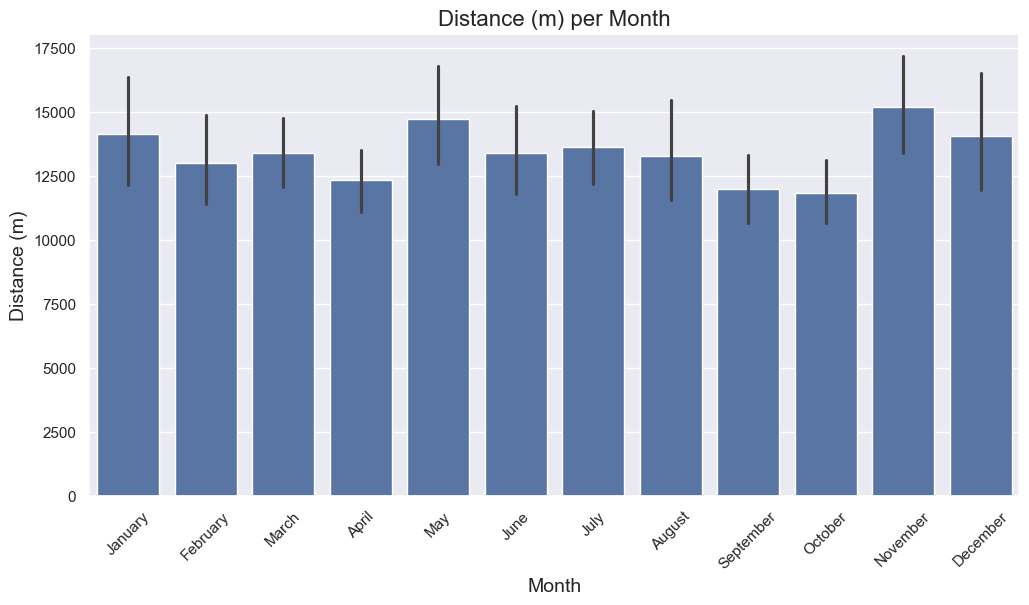

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Month Name' is in the DataFrame
df['Month Name'] = df.index.month_name()

ordered_months = ["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]
# Plot the bar diagram
plt.figure(figsize=(12, 6))
sns.barplot(x= df['Month Name'], y=df['Distance (m)'],  order=ordered_months) 

# Adding title and labels
plt.title('Distance (m) per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Distance (m)', fontsize=14)
plt.xticks(rotation=45)  # Rotate month names for better readability

# Display the plot
plt.show()


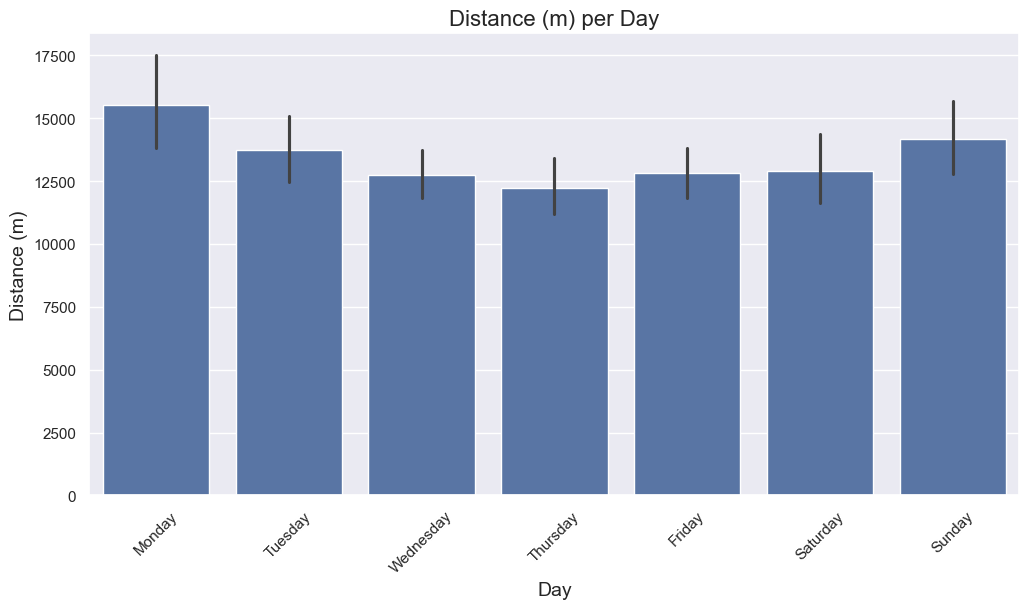

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Month Name' is in the DataFrame
df['Day Name'] = df.index.day_name()


# Sort the month names to appear in calendar order
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
                 

# Plot the bar diagram
plt.figure(figsize=(12, 6))
sns.barplot(x= df['Day Name'], y=df['Distance (m)'], order=ordered_days) 

# Adding title and labels
plt.title('Distance (m) per Day', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Distance (m)', fontsize=14)
plt.xticks(rotation=45)  # Rotate month names for better readability

# Display the plot
plt.show()


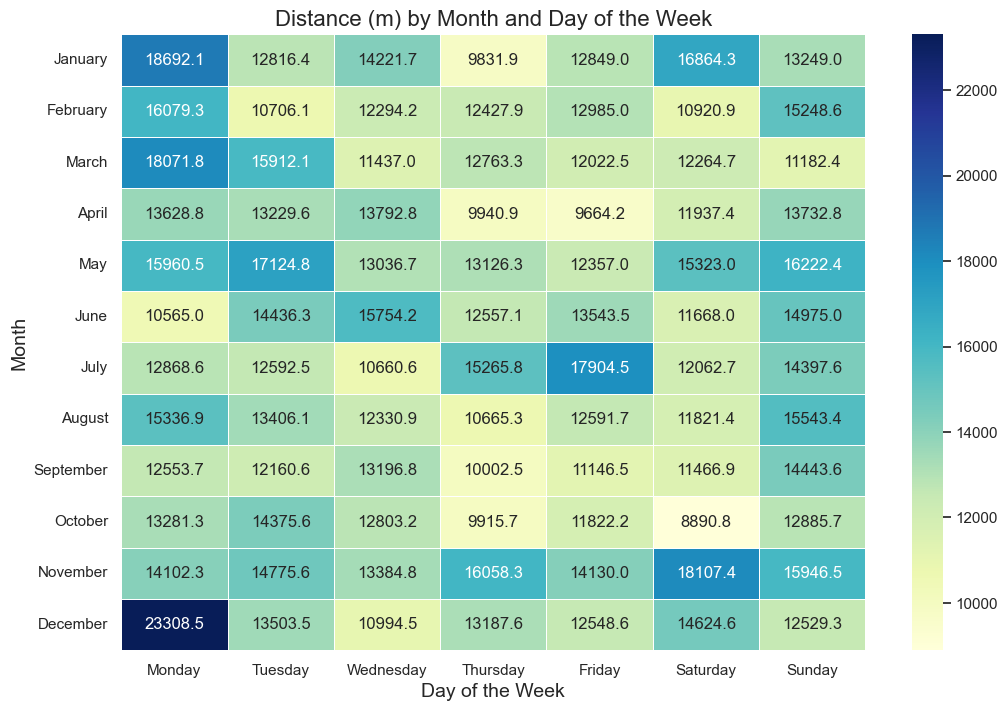

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'Month Name' and 'Day Name' are in the DataFrame
df['Month Name'] = df.index.month_name()
df['Day Name'] = df.index.day_name()

# Pivot the DataFrame to get the average calories by Month and Day
pivot_table = df.pivot_table(values='Distance (m)', index='Month Name', columns='Day Name', aggfunc='mean')

# Define the correct order for the months and days
ordered_months = ["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

pivot_table = pivot_table.reindex(index=ordered_months, columns=ordered_days)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)

# Adding title and labels
plt.title('Distance (m) by Month and Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Month', fontsize=14)

# Display the heatmap
plt.show()
